In [1]:
import requests, os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Program Files\Python311\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Program Files\Python311\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
diplomacy= pd.read_json('data/all_data.jsonl', lines=True)
diplomacy.head(2)

,messages,sender_labels,receiver_labels,speakers,receivers,absolute_message_index,relative_message_index,seasons,years,game_score,game_score_delta,players,game_id
0,[Germany!\n\nJust the person I want to speak w...,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, NOANNOTATION, NOANNOT...","[italy, germany, italy, germany, italy, italy,...","[germany, italy, germany, italy, germany, germ...","[74, 76, 86, 87, 89, 92, 97, 117, 119, 121, 12...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Spring, Spring, Spring, Spring, Spring, Sprin...","[1901, 1901, 1901, 1901, 1901, 1901, 1901, 190...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[italy, germany]",1
1,[Hello there! What's your general plan for thi...,"[True, False, True, False, True, True, True, T...","[True, True, True, True, True, NOANNOTATION, T...","[austria, italy, austria, italy, italy, austri...","[italy, austria, italy, austria, austria, ital...","[1, 67, 71, 73, 98, 99, 101, 179, 181, 185, 18...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Spring, Spring, Spring, Spring, Spring, Sprin...","[1901, 1901, 1901, 1901, 1901, 1901, 1901, 190...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, -1, -...","[italy, austria]",1


In [3]:
conversations = []
token = "|"
labels = []

for i, j in diplomacy.iterrows(): 
    conversations.append(token.join(j['messages']))
    labels.append(1)    
    
df1 = pd.DataFrame({'conversation': conversations, 'bad_intent': 1 })                     
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conversation  252 non-null    object
 1   bad_intent    252 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [4]:
df1.loc[0]['conversation']

'Germany!\n\nJust the person I want to speak with. I have a somewhat crazy idea that I’ve always wanted to try with I/G, but I’ve never actually convinced the other guy to try it. And, what’s worse, it might make you suspicious of me. \n\nSo...do I suggest it?\n\nI’m thinking that this is a low stakes game, not a tournament or anything, and an interesting and unusual move set might make it more fun? That’s my hope anyway.\n\nWhat is your appetite like for unusual and crazy?|You\'ve whet my appetite, Italy. What\'s the suggestion?|👍|It seems like there are a lot of ways that could go wrong...I don\'t see why France would see you approaching/taking Munich--while I do nothing about it--and not immediately feel skittish|Yeah, I can’t say I’ve tried it and it works, cause I’ve never tried it or seen it. But how I think it would work is (a) my Spring move looks like an attack on Austria, so it would not be surprising if you did not cover Munich. Then (b) you build two armies, which looks lik

In [5]:
good = pd.read_csv('data/full_dialog.csv')
good.head(2)

,Unnamed: 0,Unit,Turn,B4,B2
0,0,Good morning. How are you doing today?,0,0,20180904-045349_715_live
1,1,Hi. I am doing good. How about you?,0,1,20180904-045349_715_live


In [6]:
conversations = []
labels = []
n =0

for i, j in good.iterrows(): 
    # This is a new conversation, append the prevoius conversation to the conversations list
    if j['Turn'] == 0 and n == 2 :
        conversations.append(token.join(conv))
        labels.append(0)
        n=0
    # its the sencond turn=0 of each conversation
    if j['Turn'] == 0 and n == 1 :
        n =2
    # if its start of a new conversation including the very first one
    if j['Turn'] == 0 and n == 0 :
        conv = []
        # becouse there are two messages with turn=0 in each convrsation
        n =1
        
    conv.append(j['Unit'])

    
df2 = pd.DataFrame({'conversation': conversations, 'bad_intent': labels})                     
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conversation  1016 non-null   object
 1   bad_intent    1016 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ KB


In [7]:
df2.loc[0]['conversation']

"Good morning. How are you doing today?|Hi. I am doing good. How about you?|I'm doing pretty good for a Tuesday morning. |Haha. Same here, but it really feels like a Monday.|Ugh yes it does!|I can not believe how warm it is already.|Where are you from? |I am from the Midwest. What about you?|I'm from the South East. It's always warm here. |Oh, yep. You are definitely in for warm weather, which is great as far as I am concerned.|We're about to get hit by a tropical storm.|I heard that some bad weather was going to be coming. I hope it is not too severe.|Me too. It's just part of living on the Gulf. You have to be prepared for it.|Yes, I am sure you get a lot of storms.|We do. I guess I should get into what this chat is supposed to be about. Have you heard of the Charity Save The Children?|I have heard about them. What do you like about them?|I like that they're committed to helping children in need. They're very transparent in their work and do great things to help children in underpriv

In [8]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conversation  1268 non-null   object
 1   bad_intent    1268 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


In [9]:
df

,conversation,bad_intent
0,Germany!\n\nJust the person I want to speak wi...,1
1,Hello there! What's your general plan for this...,1
2,Buongiorno! \nBe kinda nice to know if you're ...,1
3,Hey italy! good luck this game. I'm guessing y...,1
4,Hello Italy what’s up what are your thoughts o...,1
...,...,...
1263,"Good morning, how are you doing today?|I'm wel...",0
1264,hi|Hi how are you?|i'm fine how are you?|I'm f...,0
1265,"hi|Hello, how are you?|i am fine. how about yo...",0
1266,Hi there! How are you today?|I am fine how are...,0


---
### Preprocessing the combined dataset

In [10]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
def text_preprocess(message):
    processed = []   
    for text in message:
        # replaace URLs
        text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)",' <URL>',text)        
        # Remove HTML/XML tags (if any)
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and symbols (not for now)
        # text = re.sub(r'[^\w\s]', '', text) 
        # Remove numbers - not in this dataset!
        #text = re.sub(r'\d+', '', text)
        # Remove whitespaces (including new lines and tabs)
        text = text.strip().replace("\n", " ").replace("\r", " ").replace("\t", " ")
        
        processed.append(text)       
    return processed

In [12]:
df['conversation'] = text_preprocess(list(df['conversation']))
df

,conversation,bad_intent
0,Germany! Just the person I want to speak with...,1
1,Hello there! What's your general plan for this...,1
2,Buongiorno! Be kinda nice to know if you're l...,1
3,Hey italy! good luck this game. I'm guessing y...,1
4,Hello Italy what’s up what are your thoughts o...,1
...,...,...
1263,"Good morning, how are you doing today?|I'm wel...",0
1264,hi|Hi how are you?|i'm fine how are you?|I'm f...,0
1265,"hi|Hello, how are you?|i am fine. how about yo...",0
1266,Hi there! How are you today?|I am fine how are...,0


---
### Feature Extraction

---
### Preaper dataset for classification

<Axes: xlabel='bad_intent', ylabel='count'>

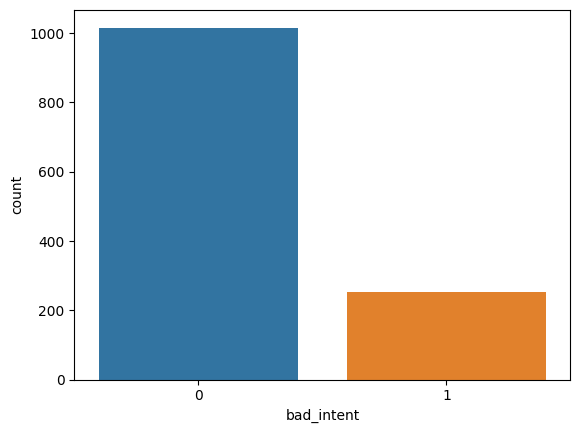

In [13]:
sns.countplot(data = df, x= df['bad_intent'])

#### balance the dataset or evalue the classification by weighted F1 score???

+ Normalization /scaling
+ Shuffling


---
### Classification